<a href="https://colab.research.google.com/github/cecilylynn/data-science-projects/blob/main/Redfin_Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

Redfin is a real-estate brokerage and they post available houses on their website [redfin.com](redfin.com). We will download housing data from their site to study.

**Directions:** Follow the instructions [here](https://support.redfin.com/hc/en-us/articles/360016476931-Downloading-Data) to download some housing data from redfin.com. *Save the file in the same location as this notebook.*

To extract the data we want, we'll use a database package called Pandas. Unfortunately, we don't have time to cover Pandas in this workshop, but we'd suggest taking some time to learn it on your own. The necessary code is provided for you below.

In [ ]:
import pandas as pd
import numpy as nd
import seaborn as sns
import matplotlib.pyplot as plt


**Directions:** Replace ```YOUR_FILE_PATH``` with the path (relative or absolute) of your data file. Be sure to keep it surrounded by apostrophes, as it is a string. You can check the File Paths doc in the notebooks folder for details on file paths.

In [ ]:
df = pd.read_csv('/content/redfin_2021-10-24-08-31-28.csv') #read in the data
df = df[['PROPERTY TYPE','PRICE','BEDS', 'BATHS', 'SQUARE FEET','$/SQUARE FEET']]

df.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,$/SQUARE FEET
0,Single Family Residential,649990,3.0,1.0,1340.0,485.0
1,Single Family Residential,595000,3.0,1.0,900.0,661.0
2,Condo/Co-op,895000,3.0,2.5,2304.0,388.0
3,Single Family Residential,595000,3.0,1.5,1780.0,334.0
4,Condo/Co-op,497000,1.0,1.5,914.0,544.0


Use pandas' dropna function to get rid of any data with missing values, then take a look at some of the data using the `head` function.

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,$/SQUARE FEET
0,Single Family Residential,649990,3.0,1.0,1340.0,485.0
1,Single Family Residential,595000,3.0,1.0,900.0,661.0
2,Condo/Co-op,895000,3.0,2.5,2304.0,388.0
3,Single Family Residential,595000,3.0,1.5,1780.0,334.0
4,Condo/Co-op,497000,1.0,1.5,914.0,544.0


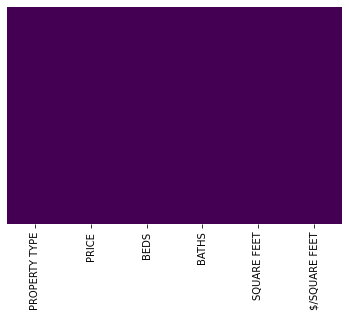

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

newdf=df.dropna()

sns.heatmap(newdf.isnull(), yticklabels=False, cbar=False, cmap="viridis")

newdf.head()

Create numpy arrays beds, baths, price for each of those columns of the pandas dataframe. The ```df['column_name'].values``` attribute might help you here.

In [ ]:
beds_np=newdf['BEDS'].values
baths_np=newdf['BATHS'].values
price_np=newdf['PRICE'].values

You can now use the arrays ```beds```, ```baths```, and ```price``` for the project below.

**Advanced option**: You can edit the above code to extract more variables for your analysis. Open your .csv file to see the other column headings and add them above. You will need to add each desired variable name in both code boxes above. Be careful - the data is incomplete, so if you add too many variables, you may not end up with many entries with no missing data.

# Project

Use the skills you've learned to visualize and analyze this data. Here are some ideas, but please come up with your own:
- Make plots to visualize the data
    - Use things you have learned so far using Matplotlib or Seaborn, or use DuckDuckGo/Bing to figure out how you can make any other plot you desire  
- Use linear regression to predict one of the variables from one or both of the others
- Calculate some emaningful statistics on the data
    - You can use the Numpy or Pandas modules, both have a lot of statistical functions.
- Find a probability distribution for the price data
- Repeat the steps above for more data from different neighborhoods or cities and compare. Maybe an extra bedroom adds more relative value to an apartment/house in one city versus another?

**Create a super short PowerPoint presentation to present your findings to others.**

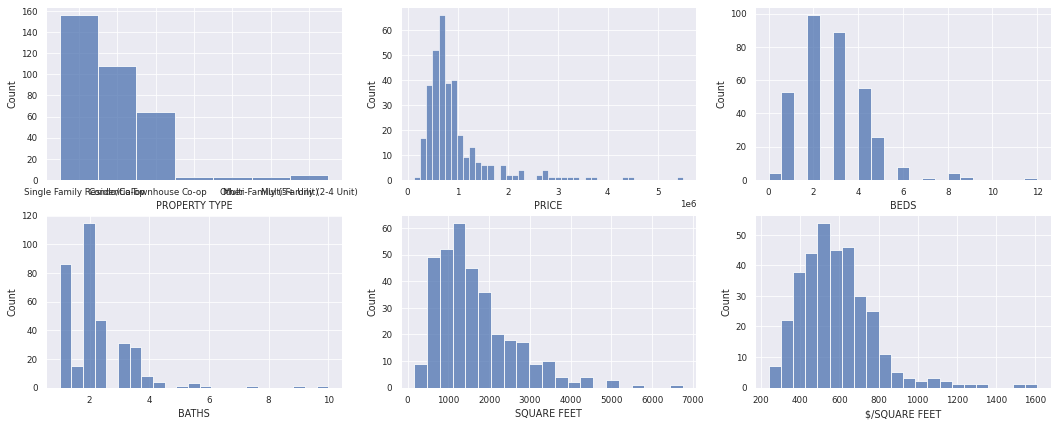

In [ ]:
#make plots to visualize the data

#initializing seaborn
sns.set_theme()
sns.set_context("paper")

#some basic plots
fig, axes = plt.subplots(2, 3, figsize=(18, 7))

ax = axes[0,0]
sns.histplot(data=newdf, x="PROPERTY TYPE", ax=ax)

ax = axes[0,1]
sns.histplot(data=newdf, x="PRICE", ax=ax)

ax=axes[0,2]
sns.histplot(data=newdf, x="BEDS", ax=ax)

ax=axes[1,0]
sns.histplot(data=newdf, x="BATHS", ax=ax)

ax=axes[1,1]
sns.histplot(data=newdf, x="SQUARE FEET",ax=ax)

ax=axes[1,2]
sns.histplot(data=newdf, x="$/SQUARE FEET",ax=ax)

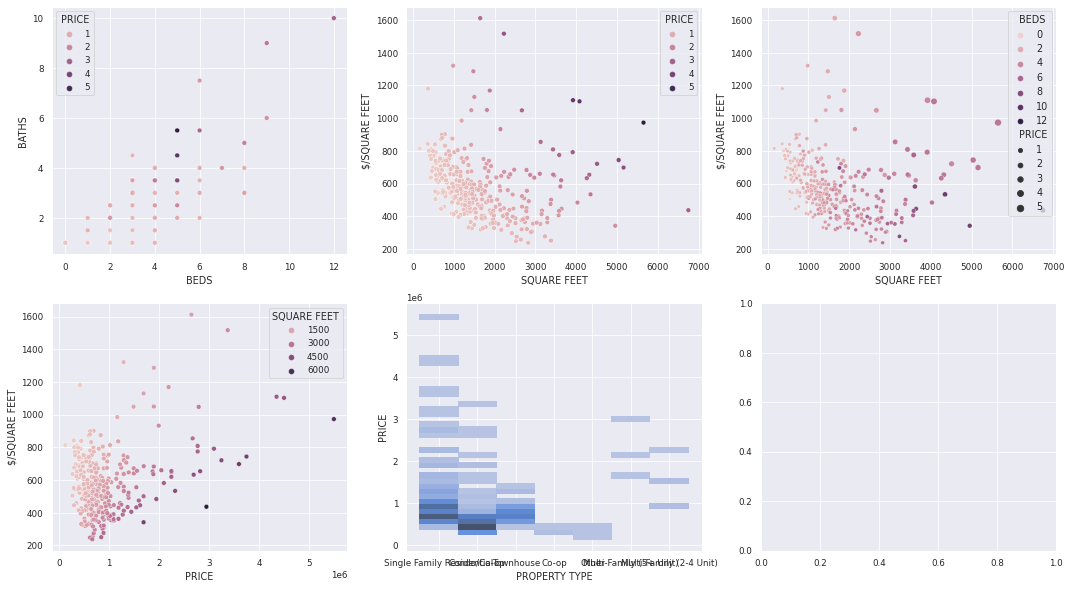

In [ ]:
#some more interesting exploration
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ax=axes[0,0]
sns.scatterplot(data=newdf,x='BEDS', y='BATHS',hue='PRICE',ax=ax)

ax=axes[0,1]
sns.scatterplot(data=newdf, x='SQUARE FEET', y='$/SQUARE FEET', hue='PRICE',ax=ax)

ax=axes[0,2]
sns.scatterplot(
    data=newdf,
    x='SQUARE FEET', y='$/SQUARE FEET', hue='BEDS', size='PRICE', ax=ax
)

ax=axes[1,0]
sns.scatterplot(
    data=newdf,
    x='PRICE', y='$/SQUARE FEET', hue='SQUARE FEET', ax=ax
)

ax=axes[1,1]
sns.histplot(data=newdf, x='PROPERTY TYPE', y='PRICE', ax=ax)

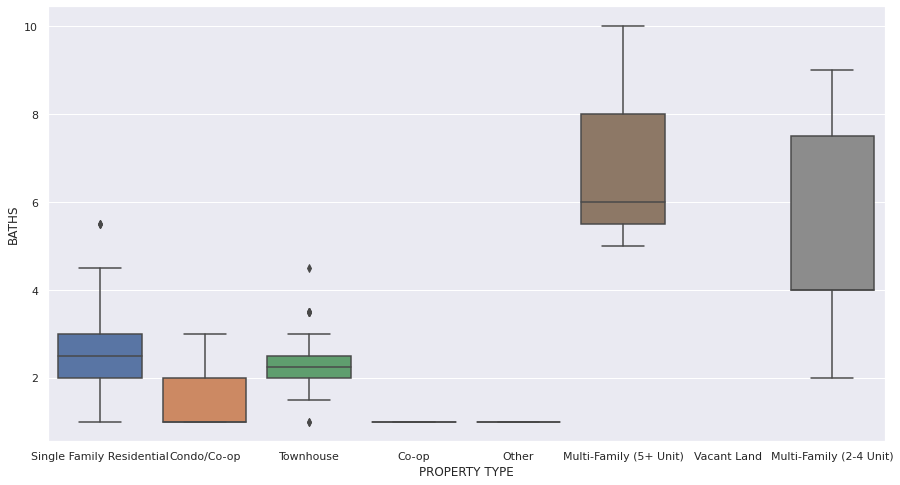

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data = df, x = "PROPERTY TYPE", y = "BATHS")


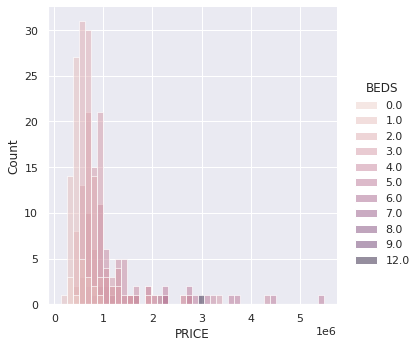

In [ ]:
sns.displot(data=df, x="PRICE", hue="BEDS")


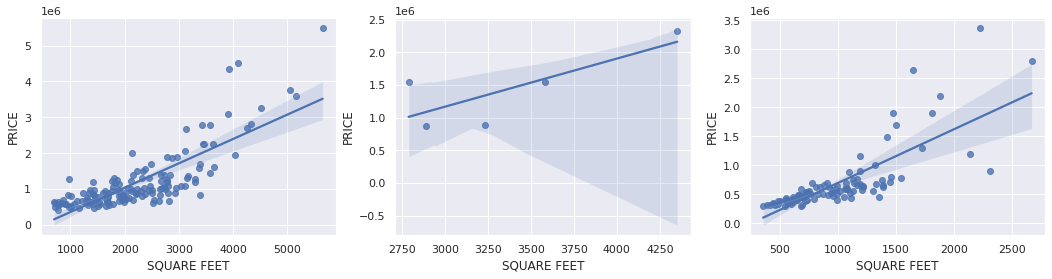

In [ ]:
single_fam_res_df = df[(df["PROPERTY TYPE"] == 'Single Family Residential')]
single_fam_res_df.head() #copying the initial data and creates a new data.frame
co_op_df = df[(df["PROPERTY TYPE"] == 'Co-op')]
co_op_df.head()
Condo_Co_op_df = df[(df["PROPERTY TYPE"] == 'Condo/Co-op')]
Multi_Family_df = df[(df["PROPERTY TYPE"] == 'Multi-Family (2-4 Unit)')]
Multi_Family_df

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

ax = axes[0] # the grid of the axes we define
sns.regplot(x="SQUARE FEET", y="PRICE", data=single_fam_res_df, ax=ax)

ax = axes[1] # the grid of the axes we define
sns.regplot(x="SQUARE FEET", y="PRICE", data=Multi_Family_df, ax=ax)

ax = axes[2] # the grid of the axes we define
sns.regplot(x="SQUARE FEET", y="PRICE", data=Condo_Co_op_df, ax=ax)

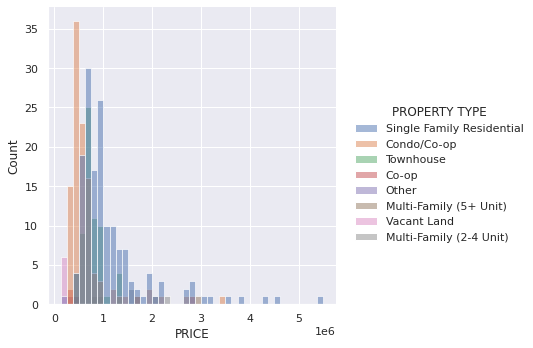

In [ ]:
#make plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data=df, x="PRICE", hue="PROPERTY TYPE")
#mixture dist
#the price for condo is generally lower than other types, townhouse price located in the middle
#more outliers for single house than other types, skewed the most


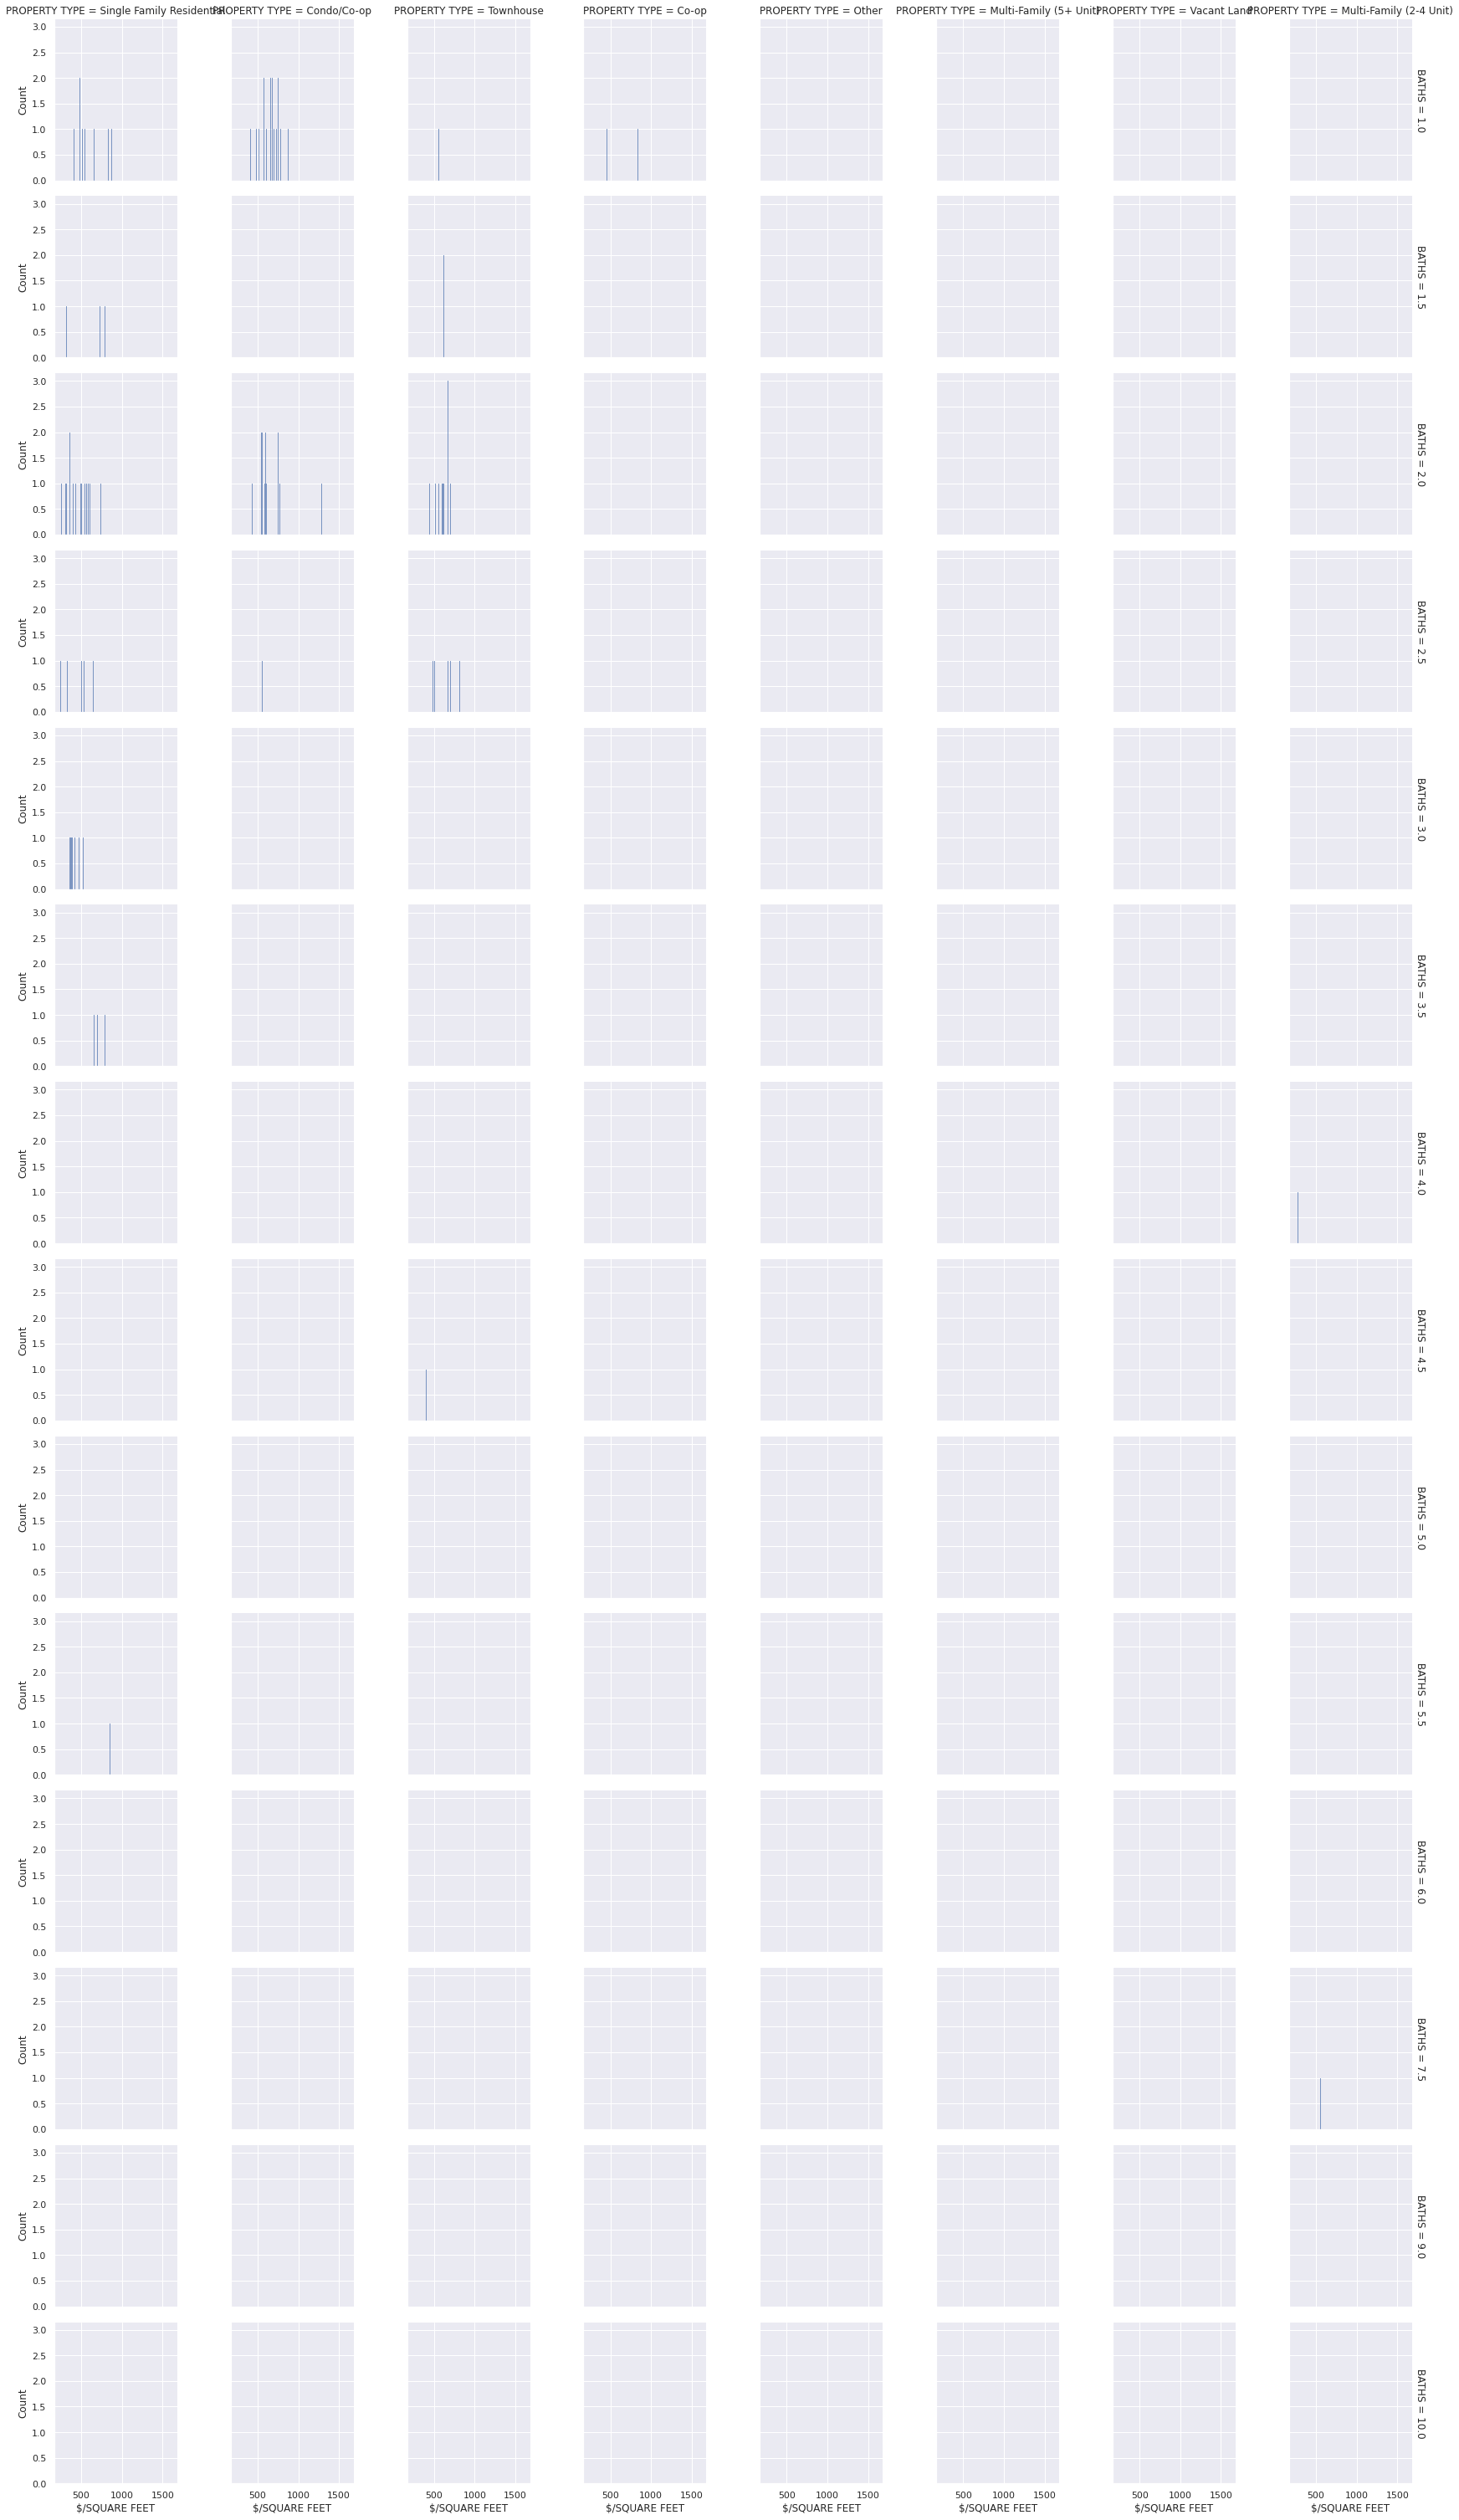

In [ ]:
sns.set_theme()
sns.displot(
    data=df, x="$/SQUARE FEET", col="PROPERTY TYPE", row="BATHS",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)
#for diff # of bathrooms, the dist for the same property type differs
#as the # of baths goes up, the unit price goes down
#most types are ..

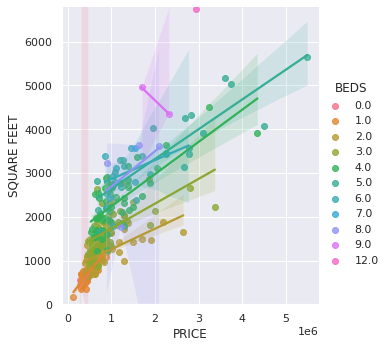

In [ ]:
#Use linear regression to predict one of the variables from one or both of the others
g = sns.lmplot(
    data=df,
    x="PRICE", y="SQUARE FEET", hue="BEDS",
    height=5
)

#propotional - the slope for larger square feet is not as steep as others
g.set(ylim=(0, 6800))
# Use more informative axis labels than are provided by default
g.set_axis_labels("PRICE", "SQUARE FEET")

In [ ]:
#Find a probability distribution for the price data
plt.hist(single_bed3_df['$/SQUARE FEET'], bins=15, alpha=0.5, density=True, label='Single')
plt.hist(town_bed3_df['$/SQUARE FEET'], bins=15, alpha=0.5, density=True, label='Townhouse')
plt.hist(condo_bed3_df['$/SQUARE FEET'], bins=15, alpha=0.5, density=True, label='Condo')
plt.legend(title='Property Type')
plt.xlabel('$/SQUARE FEET')
plt.ylabel('Density')

NameError: ignored